# Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import logging 
import os
%matplotlib inline

# Loading the datasets

In [2]:
df = pd.read_csv("Train.csv")
df2 = pd.read_csv("Test.csv")

In [3]:
df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [4]:
df.shape,df2.shape

((8523, 12), (5681, 11))

In [5]:
df.describe(include = 'all')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523,7060.000000,8523,8523.000000,8523,8523.000000,8523,8523.000000,6113,8523,8523,8523.000000
unique,1559,NaN,5,NaN,16,NaN,10,NaN,3,3,4,NaN
top,FDW13,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT027,NaN,Medium,Tier 3,Supermarket Type1,NaN
freq,10,NaN,5089,NaN,1232,NaN,935,NaN,2793,3350,5577,NaN
mean,NaN,12.857645,NaN,0.066132,NaN,140.992782,NaN,1997.831867,NaN,NaN,NaN,2181.288914
std,NaN,4.643456,NaN,0.051598,NaN,62.275067,NaN,8.371760,NaN,NaN,NaN,1706.499616
min,NaN,4.555000,NaN,0.000000,NaN,31.290000,NaN,1985.000000,NaN,NaN,NaN,33.290000
25%,NaN,8.773750,NaN,0.026989,NaN,93.826500,NaN,1987.000000,NaN,NaN,NaN,834.247400
50%,NaN,12.600000,NaN,0.053931,NaN,143.012800,NaN,1999.000000,NaN,NaN,NaN,1794.331000
75%,NaN,16.850000,NaN,0.094585,NaN,185.643700,NaN,2004.000000,NaN,NaN,NaN,3101.296400


### Observations:
1. Item_Visibility has a min value of zero. When a product is being sold in a store, the visibility cannot be 0.
2. Outlet_Establishment_Year vary from 1985 to 2009. The Older Outlets will also tend to have loyal customers and that's how the sales margin can be acheived.

# Check the null values

In [6]:
df.isnull().sum() 

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
df2.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

# Checking the size and types of columns in the dataset

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


### Observations:
1. There are 7 Categorical Variables in the Train.csv Data 
2. There are 5 Numerical Variables in the Train.csv Data 

In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


### Observations:
1. There are 7 Categorical Variables in the Test.csv Data 
2. There are 4 Numerical Variables in the Test.csv Data 

# Exploring the frequency of columns

In [10]:
categorical_columns = [x for x in df.dtypes.index if df.dtypes[x]=='object']
categorical_columns = [x for x in categorical_columns if x not in ['Item_Identifier','Outlet_Identifier']]
for col in categorical_columns:
    print ('\nFrequency of Categories for varible %s'%col)
    print (df[col].value_counts())


Frequency of Categories for varible Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Frequency of Categories for varible Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

Frequency of Categories for varible Outlet_Size
Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

Frequency of Categories for varible Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

F

### Observations:
1. Item_Fat_Content: We have to standardize 'LF','reg','low fat' as 'Low Fat', 'Regular' and 'Low Fat' respectively as they are basically the same.    
2. Item_Type: Some items have very little frequency. Combining them will give us better results.
3. Outlet_Type: If the Supermarket Type3 and Supermarket Type2 are similar , they can be combined for better results. 

In [11]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [12]:
df2.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


# 

# Data Cleaning

In [13]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

## 1. Imputing 'Item_Weight' column.
Since 'Item_Weight' is a numerical column, we can use mean or median to impute its missing values.

<AxesSubplot:xlabel='Item_Weight'>

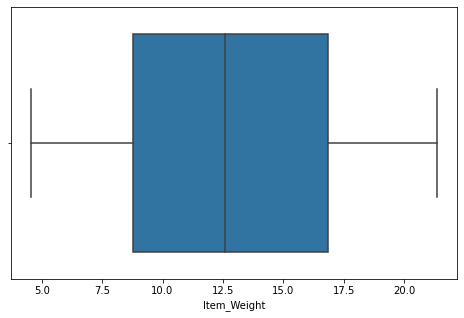

In [14]:

plt.figure(figsize=(8,5))
sns.boxplot(x='Item_Weight',data=df)

<AxesSubplot:xlabel='Item_Weight'>

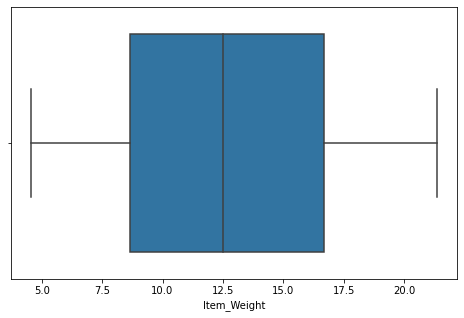

In [15]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Item_Weight',data=df2)

### Observation:
The above plots show that there are no Outliers in the data. Therefore we can use mean to impute missing values. 

In [16]:
df['Item_Weight']=df['Item_Weight'].fillna(df['Item_Weight'].mean())
sum(df['Item_Weight'].isnull())

0

In [17]:
df2['Item_Weight']=df['Item_Weight'].fillna(df2['Item_Weight'].mean())
sum(df['Item_Weight'].isnull())

0

# 

## 2. Imputing 'Outlet_Size' column.
Since 'Outlet_Size' is a categorical column we can use mode to impute its missing values.

In [18]:
print("Values before imputation:")
print()
print(df['Outlet_Size'].value_counts())
print('******************************************')
print(df2['Outlet_Size'].value_counts())

Values before imputation:

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64
******************************************
Medium    1862
Small     1592
High       621
Name: Outlet_Size, dtype: int64


In [19]:
from scipy.stats import mode
df=df.fillna(df.mean())
#Determing the mode 
outlet_size_mode = df.pivot_table(values=['Outlet_Size'], columns=['Outlet_Type'],aggfunc=lambda x:mode(x).mode[0] )
print('Mode for each Outlet_Type:')
outlet_size_mode

Mode for each Outlet_Type:


Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [20]:
#Get a boolean variable specifying missing Item_Weight values
miss_bool = df['Outlet_Size'].isnull() 

In [21]:
#Impute data and check missing values before and after imputation to confirm
print ('\nOrignal missing value in Outlet_Size: %d'% sum(miss_bool))


Orignal missing value in Outlet_Size: 2410


In [22]:
# replace all missing value with mode of outlet_type with outlet_size
df.loc[miss_bool,'Outlet_Size'] = df.loc[miss_bool,'Outlet_Type'].apply(lambda x: outlet_size_mode[x])
print( "Now missing value count in Outlet size:",sum(df['Outlet_Size'].isnull()))

Now missing value count in Outlet size: 0


# 

In [23]:
from scipy.stats import mode
df2=df2.fillna(df2.mean())
#Determing the mode 
outlet_size_mode2 = df.pivot_table(values=['Outlet_Size'], columns=['Outlet_Type'],aggfunc=lambda x:mode(x).mode[0] )
print('Mode for each Outlet_Type:')
outlet_size_mode2

Mode for each Outlet_Type:


Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [24]:
#Get a boolean variable specifying missing Item_Weight values
miss_bool2 = df2['Outlet_Size'].isnull() 

In [25]:
#Impute data and check missing values before and after imputation to confirm
print ('\nOrignal missing value in Outlet_Size: %d'% sum(miss_bool2))


Orignal missing value in Outlet_Size: 1606


In [26]:
# replace all missing value with mode of outlet_type with outlet_size
df2.loc[miss_bool2,'Outlet_Size'] = df2.loc[miss_bool2,'Outlet_Type'].apply(lambda x: outlet_size_mode[x])
print( "Now missing value count in Outlet size:",sum(df['Outlet_Size'].isnull()))

Now missing value count in Outlet size: 0


In [27]:
print("Values after imputation:")
print()
print(df['Outlet_Size'].value_counts())
print('******************************************')
print(df2['Outlet_Size'].value_counts())

Values after imputation:

Small     4798
Medium    2793
High       932
Name: Outlet_Size, dtype: int64
******************************************
Small     3198
Medium    1862
High       621
Name: Outlet_Size, dtype: int64


# 

## 3. Cleaning the 'Item_Fat_Content' column.

In [28]:
print("Item Fat content :")

df['Item_Fat_Content']=df['Item_Fat_Content'].map({'LF':'Low Fat',
                                                   'reg':'Regular',
                                                   'low fat':'Low Fat',
                                                   'Low Fat':'Low Fat',
                                                   'Regular':'Regular'})
df['Item_Fat_Content'].value_counts()

Item Fat content :


Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [29]:
print("Item Fat content :")

df2['Item_Fat_Content']=df['Item_Fat_Content'].map({'LF':'Low Fat',
                                                   'reg':'Regular',
                                                   'low fat':'Low Fat',
                                                   'Low Fat':'Low Fat',
                                                   'Regular':'Regular'})
df2['Item_Fat_Content'].value_counts()

Item Fat content :


Low Fat    3677
Regular    2004
Name: Item_Fat_Content, dtype: int64

# 

# Exploratory Data Analysis

## Univariate Analysis
Uni means one.Univariate means one variable analysis.Univariate analysis explores each variable in a data set. Variables could be either categorical or numerical.There are different statistical and visualization techniques of investigation for each type of variable.The key pointers to the univariate analysis is to find out outliers present in data.

In [30]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

### 1) Item_Outlet_Sales

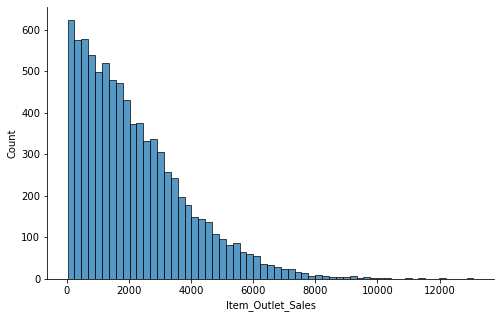

In [31]:
plt.figure(figsize=(8,5))
sns.histplot(x='Item_Outlet_Sales',data=df)
sns.despine()

#### Observation:
As it is a right skewd variable, we would need some data transformation to treat its skewness.

# 

### 2) Item_Weight

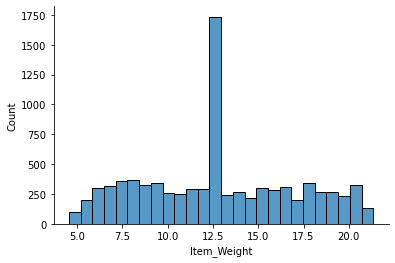

In [32]:
sns.histplot(x='Item_Weight',data=df)
sns.despine()

#### Observation:
There is no useful pattern that we can see here, items with 12.5 kg weight are the highest.

# 

### 3) Item_Visibility

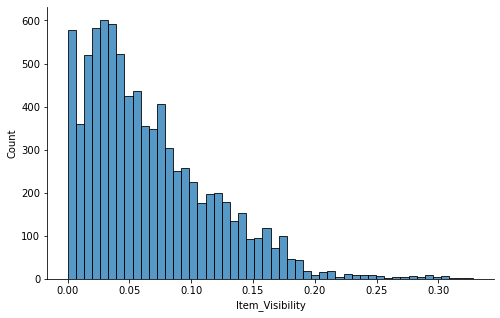

In [33]:
plt.figure(figsize=(8,5))
sns.histplot(x='Item_Visibility',data=df)
sns.despine()

#### Observations:
1. Item_Visibility is right-skewed and should be transformed to treat its skewness.
2. Many items have zero visibility which is not accurate, if the item is present in store then its visibility can't be zero.

# 

### 4) Item_MRP

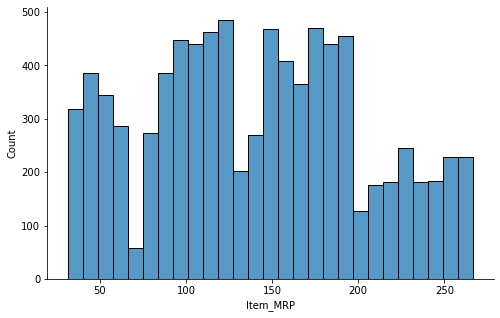

In [34]:
plt.figure(figsize=(8,5))
sns.histplot(x='Item_MRP',data=df)
sns.despine()

#### Observations:
1. Items with high MRP are less and items with MRP 100 to 200 are the most 
2. Items can be seen in a pattern of 4 different groups. 

# 

### 5) Item_Fat_Content

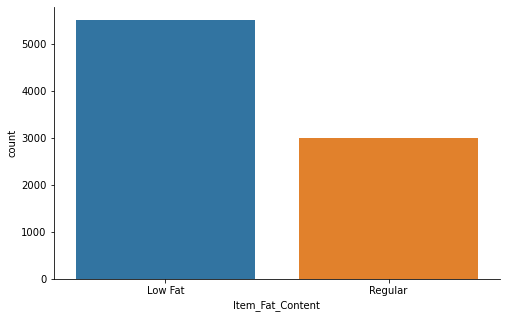

In [35]:
plt.figure(figsize=(8,5))
sns.countplot(x='Item_Fat_Content',data=df)
sns.despine()

# 

### 6) Item_Type

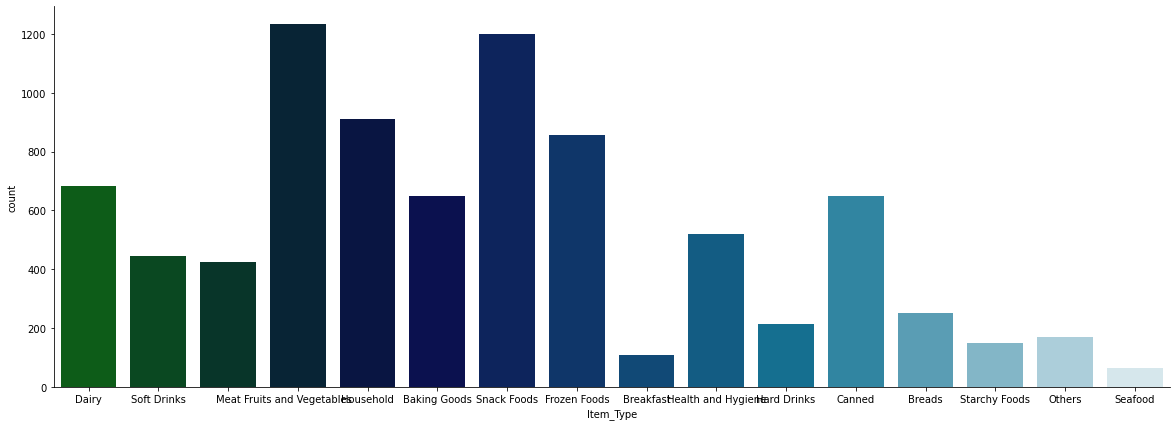

In [36]:
plt.figure(figsize=(20,7))
sns.countplot(x='Item_Type',data=df,palette='ocean')
sns.despine()

#### Observations:
    Stock for Fruits and Vegetables, Snack Foods and Household is very high as they are one of essential items, while stocks for Seafood is the lowest.

# 

### 7) Outlet_Size

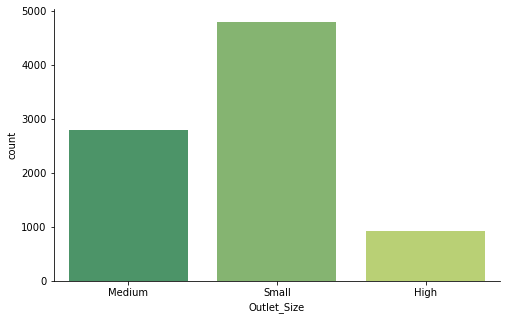

In [37]:
plt.figure(figsize=(8,5))
sns.countplot(x='Outlet_Size',data=df,palette='summer')
sns.despine()

# 

### 8) Outlet_Type

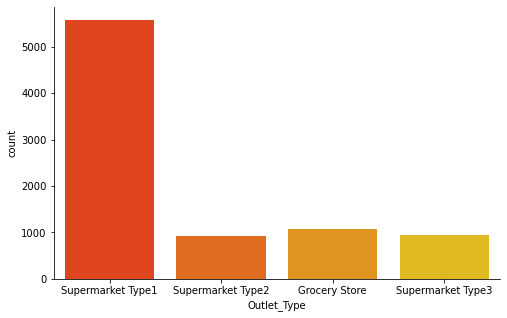

In [38]:
plt.figure(figsize=(8,5))
sns.countplot(x='Outlet_Type',data=df,palette='autumn')
sns.despine()

#### Observations:
Supermarket Type 1 is the most popular type of supermarket

# 

### 9) Outlet_Location_Type

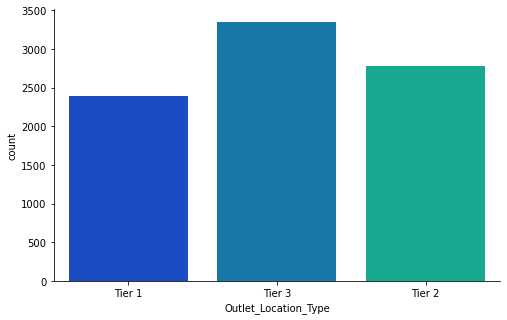

In [39]:
plt.figure(figsize=(8,5))
sns.countplot(x='Outlet_Location_Type',data=df,palette='winter')
sns.despine()

#### Observation:
Most of the Oulets are located in Tier 3 and Tier 2 cities

# 

### 10) Outlet_Establishment_Year

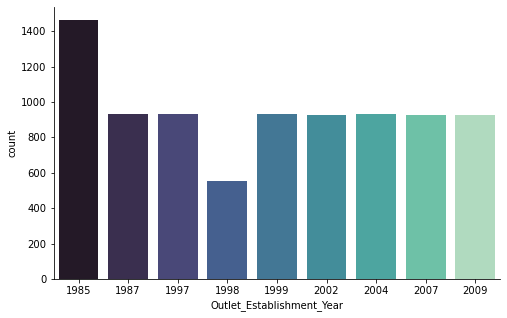

In [40]:
plt.figure(figsize=(8,5))
sns.countplot(x='Outlet_Establishment_Year',data=df,palette='mako')
sns.despine()

#### Observations:
The oldest store was opened in 1985 and the newest one has opened in 2009. We can say stores in dataset are generally old stores. More than 19-20 years old.

# 

## Bivariate analysis

Bivariate analysis is the simultaneous analysis of two variables (attributes). It explores the concept of relationship between two variables, whether there exists an association and the strength of this association, or whether there are differences between two variables and the significance of these differences.

After looking at every feature individually, let’s now do some bivariate analysis. Here we’ll explore the independent variables with respect to the target variable. The objective is to discover hidden relationships between the independent variable and the target variable and use those findings in missing data imputation and feature engineering in the next module.

### 'Item_Outlet_Sales' is our feature column in this dataset as we are asked to predict the outlet sales. Hence, its our Target Variable

In [41]:
df.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.012049,0.024756,-0.008301,0.011550
Item_Visibility,-0.012049,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.024756,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.008301,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.011550,-0.128625,0.567574,-0.049135,1.000000


### Finding Correlation between the numerical variables

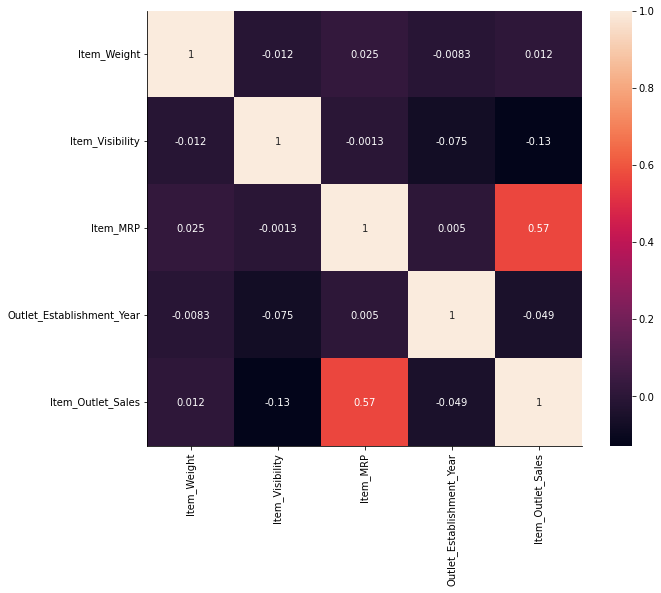

In [42]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,square=True)
sns.despine()

### 1) Item_Fat_Content v/s Item_Outlet_Sales

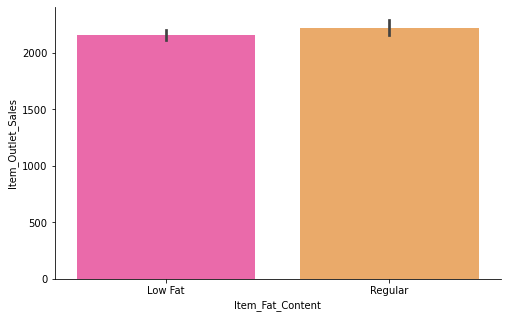

In [43]:
plt.figure(figsize=(8,5))
sns.barplot(x='Item_Fat_Content',y='Item_Outlet_Sales',data=df,palette='spring')
sns.despine()

#### Observations:
The fat content of the item does not affect its sales.

# 

### 2) Item_Visibilty v/s Item_Outlet_Sales

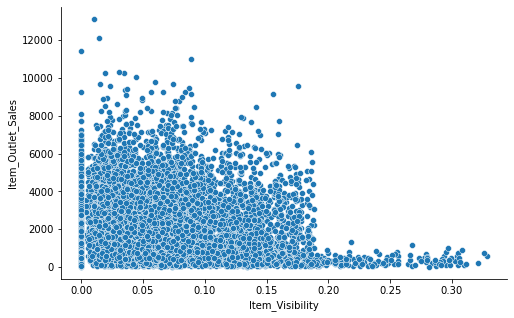

In [44]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Item_Visibility',y='Item_Outlet_Sales',data=df)
sns.despine()

#### Observations:
1. Item_Visibility is right-skewed and should be transformed to treat its skewness.
2. Many Items have zero visibility, if the item is sold in outlets its visibility cannot be zero.

# 

### 3) Item_MRP v/s Item_Outlet_Sales

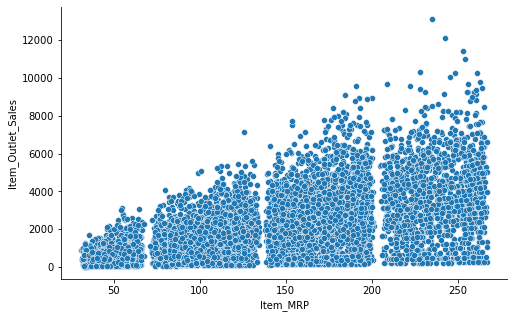

In [45]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Item_MRP',y='Item_Outlet_Sales',data=df)
sns.despine()

#### Observations: 
1. We can see 4 segments of prices that can be used in feature engineering to create a new variable.
2. We can also see that as the price increases , sales also increase.

# 

### 4) Item_Type v/s Item_Outlet_Sales

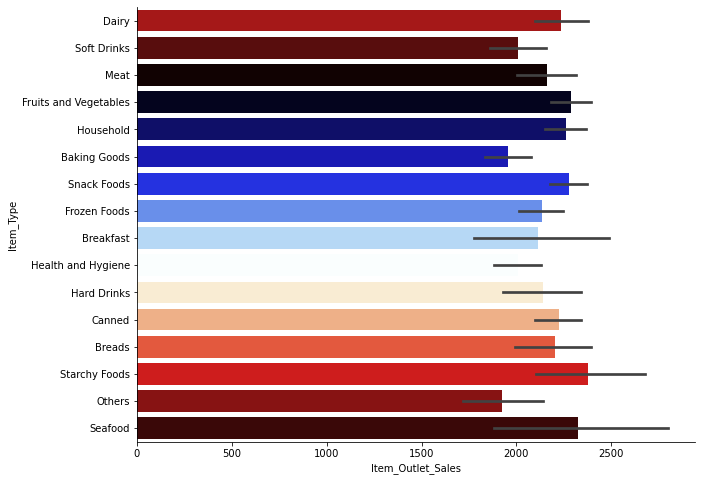

In [46]:
plt.figure(figsize=(10,8))
sns.barplot(y='Item_Type',x='Item_Outlet_Sales',data=df,palette='flag')
sns.despine()

#### Observation:
The Fruits-Veggies and Snack Foods were the most available items but the Sales of Seafood and Starchy Foods seems higher. Hence the sales can be improved by having higher quantity stock of these products.

# 

### 5) Outlet_Size v/s Item_Outlet_Sales

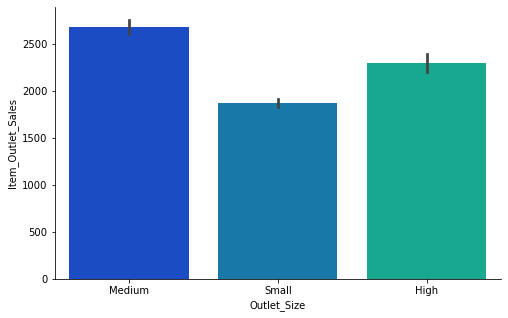

In [47]:
plt.figure(figsize=(8,5))
sns.barplot(x='Outlet_Size',y='Item_Outlet_Sales',data=df,palette='winter')
sns.despine()

#### Observations:
The Outlet Size affects the Sales. Medium size outlets have the highest sales.

# 

### 6) Outlet_Location_Type v/s Item_Outlet_Sales

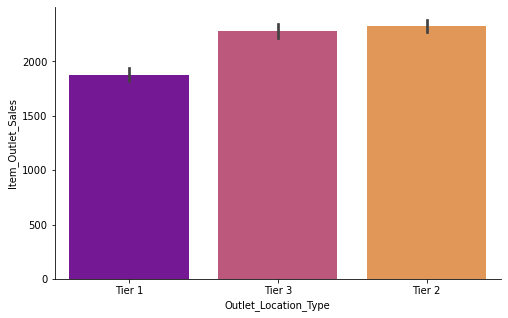

In [48]:
plt.figure(figsize=(8,5))
sns.barplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',data=df,palette='plasma')
sns.despine()

#### Observations: 
Outlet Location also affects the sales. Outlets in Tier 2 cities have the highest sales. Tier 3 sales look higher than Tier 1 because Tier 3 has the highest number of outlets.

# 

### 7) Outlet_Establishment_Year v/s Item_Outlet_Sales

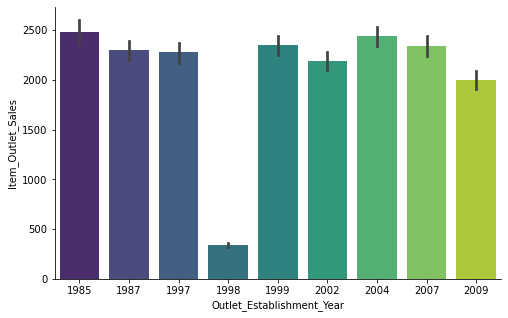

In [49]:
plt.figure(figsize=(8,5))
sns.barplot(x='Outlet_Establishment_Year',y='Item_Outlet_Sales',data=df,palette='viridis')
sns.despine()

#### Observations: 
It can easily be concluded that the outlet establishment years affect the outlet sales.

# 

### Finding the squareroot of 'Item_Outlet_Sales' column.
The square root method is typically used when your data is moderately skewed. Now using the square root (e.g., sqrt(x)) is  a transformation that has a moderate effect on distribution shape. It is generally used to reduce right skewed data. Finally, the square root can be applied on zero values and is most commonly used on counted data.

In [50]:
df['Outlet_Sales_sqrt']=df['Item_Outlet_Sales'].apply(np.sqrt)

Item_Outlet_Sales distribution before applying the Square Root Method


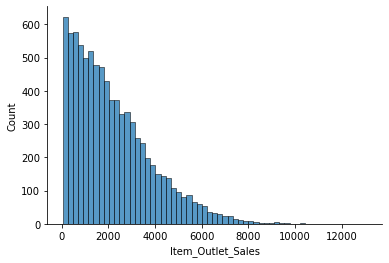

In [51]:
print("Item_Outlet_Sales distribution before applying the Square Root Method")
sns.histplot(x='Item_Outlet_Sales',data=df)
sns.despine()

Item_Outlet_Sales distribution after applying the Square Root Method


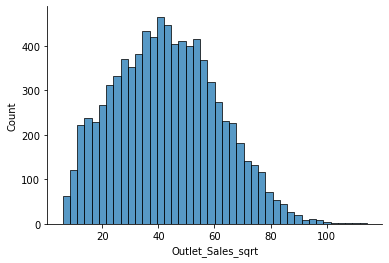

In [52]:
print('Item_Outlet_Sales distribution after applying the Square Root Method')
sns.histplot(x='Outlet_Sales_sqrt',data=df)
sns.despine()

#### Observations:
As we can see, the data is no more right-skewed.

# 

## Feature Engineering

### Step 1. Create a broad category of Type of Item

Earlier we saw that the Item_Type variable has 16 categories which might prove to be very useful in analysis. So its a good idea to combine them. One way could be to manually assign a new category to each. But there’s a catch here. If you look at the Item_Identifier, i.e. the unique ID of each item, it starts with either FD, DR or NC. If you see the categories, these look like being Food, Drinks and Non-Consumables. So I’ve used the Item_Identifier variable to create a new column:

In [53]:
#Get the first two characters of ID:
df['Item_Type_Combined'] = df['Item_Identifier'].apply(lambda x: x[0:2])
#Rename them to more intuitive categories:
df['Item_Type_Combined'] = df['Item_Type_Combined'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})
df['Item_Type_Combined'].value_counts()

Food              6125
Non-Consumable    1599
Drinks             799
Name: Item_Type_Combined, dtype: int64

### Step 2. Modifying Item_Visibility

In [54]:
df['Item_Visibility'].replace(0,np.NaN,inplace=True)
df['Item_Visibility']=df['Item_Visibility'].fillna(df['Item_Visibility'].mean())

### Step 3. Modifying Outlet_Establishment_Year

In [55]:
# 2013 bcoz it is given in the problem statement
df['Outlet_Years'] = 2013 - df['Outlet_Establishment_Year']
df['Outlet_Years'].describe()

count    8523.000000
mean       15.168133
std         8.371760
min         4.000000
25%         9.000000
50%        14.000000
75%        26.000000
max        28.000000
Name: Outlet_Years, dtype: float64

### Step 4. Modifying categories of Item_Fat_Content
In step 1 we saw there were some non-consumables as well and a fat-content should not be specified for them. So we can also create a separate category for such kind of observations.

In [56]:
df.loc[df['Item_Type_Combined']=="Non-Consumable",'Item_Fat_Content'] = "Non-Edible"
df['Item_Fat_Content'].value_counts()

Low Fat       3918
Regular       3006
Non-Edible    1599
Name: Item_Fat_Content, dtype: int64

In [57]:
df['Item_Type_Combined'].value_counts()

Food              6125
Non-Consumable    1599
Drinks             799
Name: Item_Type_Combined, dtype: int64

In [58]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Sales_sqrt,Item_Type_Combined,Outlet_Years
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,61.115775,Food,14
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,21.057607,Drinks,4
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,45.795961,Food,14
3,FDX07,19.200,Regular,0.070482,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,27.062520,Food,15
4,NCD19,8.930,Non-Edible,0.070482,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,31.538947,Non-Consumable,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,52.710373,Food,26
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Small,Tier 2,Supermarket Type1,549.2850,23.436830,Food,11
8520,NCJ29,10.600,Non-Edible,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,34.541477,Non-Consumable,9
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,42.960419,Food,4


### Step 5. Label Encoding

In [59]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cat_var=["Item_Fat_Content","Outlet_Size","Outlet_Location_Type","Outlet_Type","Item_Type_Combined"]
for i in cat_var:
    df[i]=le.fit_transform(df[i])

### Step 6. One-Hot Encoding 

In [60]:
df = pd.get_dummies(df, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type',
                              'Item_Type_Combined'])

In [61]:
df.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Sales_sqrt,Outlet_Years,...,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,Item_Type_Combined_0,Item_Type_Combined_1,Item_Type_Combined_2
0,FDA15,9.30,0.016047,Dairy,249.8092,OUT049,1999,3735.1380,61.115775,14,...,0,1,0,0,1,0,0,0,1,0
1,DRC01,5.92,0.019278,Soft Drinks,48.2692,OUT018,2009,443.4228,21.057607,4,...,0,1,0,0,0,1,0,1,0,0
2,FDN15,17.50,0.016760,Meat,141.6180,OUT049,1999,2097.2700,45.795961,14,...,0,1,0,0,1,0,0,0,1,0
3,FDX07,19.20,0.070482,Fruits and Vegetables,182.0950,OUT010,1998,732.3800,27.062520,15,...,0,0,1,1,0,0,0,0,1,0
4,NCD19,8.93,0.070482,Household,53.8614,OUT013,1987,994.7052,31.538947,26,...,1,0,0,0,1,0,0,0,0,1


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Identifier          8523 non-null   object 
 6   Outlet_Establishment_Year  8523 non-null   int64  
 7   Item_Outlet_Sales          8523 non-null   float64
 8   Outlet_Sales_sqrt          8523 non-null   float64
 9   Outlet_Years               8523 non-null   int64  
 10  Item_Fat_Content_0         8523 non-null   uint8  
 11  Item_Fat_Content_1         8523 non-null   uint8  
 12  Item_Fat_Content_2         8523 non-null   uint8  
 13  Outlet_Location_Type_0     8523 non-null   uint8

In [63]:
df.drop(['Item_Type','Outlet_Establishment_Year'],axis=1,inplace=True)

## Making a Logging Function

In [64]:
# Create the Handler for logging records/messages to a file
file_handler = logging.FileHandler("log_file.log")

In [65]:
#set the format of the log records and the logging level to DEBUG
logging.basicConfig(format='%(asctime)s %(levelname)s:%(message)s', level=logging.DEBUG)

In [66]:
# a function  to create and save logs in the log files
def log(path, file):
    """[Create a log file to record the experiment's logs]
    
    Arguments:
        path {string} -- path to the directory
        file {string} -- file name
    
    Returns:
        [obj] -- [logger that record logs]
    """

    # check if the file exist
    log_file = os.path.join(path, file)

    if not os.path.isfile(log_file):
        open(log_file, "w+").close()

    console_logging_format = "%(levelname)s %(message)s"
    file_logging_format = "%(levelname)s: %(asctime)s: %(message)s"

    # configure logger
    logging.basicConfig(level=logging.INFO, format=console_logging_format)
    logger = logging.getLogger()
    
    # create a file handler for output file
    handler = logging.FileHandler(log_file)

    # set the logging level for log file
    handler.setLevel(logging.INFO)
    
    # create a logging format
    formatter = logging.Formatter(file_logging_format)
    handler.setFormatter(formatter)

    # add the handlers to the logger
    logger.addHandler(handler)

    return logger

In [67]:
logger = log(path=".",file="log_file.log")

In [68]:
logger.info("Start data training with Models")

2022-03-03 15:26:23,446 INFO:Start data training with Models


In [69]:
X=df.drop(['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales','Outlet_Sales_sqrt'],axis=1)
Y=df['Item_Outlet_Sales']
X

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Years,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,Item_Type_Combined_0,Item_Type_Combined_1,Item_Type_Combined_2
0,9.300,0.016047,249.8092,14,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0
1,5.920,0.019278,48.2692,4,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0
2,17.500,0.016760,141.6180,14,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0
3,19.200,0.070482,182.0950,15,0,0,1,0,0,1,0,0,1,1,0,0,0,0,1,0
4,8.930,0.070482,53.8614,26,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,26,1,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0
8519,8.380,0.046982,108.1570,11,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0
8520,10.600,0.035186,85.1224,9,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1
8521,7.210,0.145221,103.1332,4,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0


## StandardScaler

In [70]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [71]:
arr  = sc.fit_transform(X)

In [72]:
arr

array([[-0.84187169, -1.11712348,  1.74745381, ..., -0.32162682,
         0.62570776, -0.48055788],
       [-1.64170589, -1.05081758, -1.48902325, ...,  3.10919344,
        -1.59819018, -0.48055788],
       [ 1.09855449, -1.1024957 ,  0.01004021, ..., -0.32162682,
         0.62570776, -0.48055788],
       ...,
       [-0.53424315, -0.72434726, -0.89720755, ..., -0.32162682,
        -1.59819018,  2.08091479],
       [-1.33644372,  1.53381427, -0.60797692, ..., -0.32162682,
         0.62570776, -0.48055788],
       [ 0.45963367, -0.52544467, -1.05226104, ...,  3.10919344,
        -1.59819018, -0.48055788]])

In [73]:
file = open('sc.pkl', 'wb')

#dump information to that file
pickle.dump(sc, file)
file.close()

# Train-Test Split 

In [74]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(arr,Y,test_size=0.30,random_state=42)

In [75]:
x_train

array([[-1.21575868e+00,  1.58888968e+00, -3.90968838e-01, ...,
        -3.21626820e-01,  6.25707763e-01, -4.80557879e-01],
       [ 1.63098850e+00, -1.15295495e+00, -6.09582794e-01, ...,
        -3.21626820e-01, -1.59819018e+00,  2.08091479e+00],
       [ 4.03538260e-14, -3.33718149e-01, -1.90485191e-01, ...,
        -3.21626820e-01,  6.25707763e-01, -4.80557879e-01],
       ...,
       [ 1.12221822e+00, -1.05768333e+00,  1.54751937e+00, ...,
        -3.21626820e-01, -1.59819018e+00,  2.08091479e+00],
       [ 1.77297090e+00, -3.30802399e-01, -3.70092485e-01, ...,
        -3.21626820e-01,  6.25707763e-01, -4.80557879e-01],
       [ 8.26421548e-01, -1.09771135e+00, -7.26686288e-01, ...,
        -3.21626820e-01, -1.59819018e+00,  2.08091479e+00]])

# Model Building

## 1. Linear Regression

In [76]:
from sklearn.linear_model import LinearRegression
lreg=LinearRegression()

In [77]:
lreg.fit(x_train,y_train)
lreg_score=lreg.score(x_train,y_train)
logger.info("Train {}".format("LinearRegression"))

2022-03-03 15:26:23,866 INFO:Train LinearRegression


In [78]:
print("Score:")
lreg_score=lreg.score(x_test,y_test)
print(lreg_score)

Score:
0.568960375477374


In [79]:
lreg_predict=lreg.predict(x_test)

In [80]:
from sklearn import metrics
MAE=metrics.mean_absolute_error(y_test,lreg_predict)
print(" MAE:",MAE)
MSE=metrics.mean_squared_error(y_test,lreg_predict)
print("MSE:",MSE)
RMSE=np.sqrt(metrics.mean_squared_error(y_test,lreg_predict))
print("RMSE:",RMSE)
logger.info("MAE: {}\n\t\t\t\t\t\t\t   MSE:{}\n\t\t\t\t\t\t\t   RMSE:{}".format(metrics.mean_absolute_error(y_test, lreg_predict),
                                                                                metrics.mean_squared_error(y_test, lreg_predict),
                                                                                np.sqrt(metrics.mean_squared_error(y_test, lreg_predict))))

2022-03-03 15:26:23,915 INFO:MAE: 810.3634930138354
							   MSE:1207339.198324178
							   RMSE:1098.7898790597674


 MAE: 810.3634930138354
MSE: 1207339.198324178
RMSE: 1098.7898790597674


# 

## 2. RandomForestRegressor

In [81]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor()
regr.fit(x_train, y_train)

RandomForestRegressor()

In [82]:
logger.info("Train {}".format("RandomForestRegressor"))

2022-03-03 15:26:26,628 INFO:Train RandomForestRegressor


In [83]:
print("Score:")
regr_score=regr.score(x_test,y_test)
print(regr_score)

Score:
0.5449236119573959


In [84]:
regr_predict=regr.predict(x_test)

In [85]:
MAE=metrics.mean_absolute_error(y_test,regr_predict)
print(" MAE:",MAE)
MSE=metrics.mean_squared_error(y_test,regr_predict)
print("MSE:",MSE)
RMSE=np.sqrt(metrics.mean_squared_error(y_test,regr_predict))
print("RMSE:",RMSE)
logger.info("MAE: {}\n\t\t\t\t\t\t\t   MSE:{}\n\t\t\t\t\t\t\t   RMSE:{}".format(metrics.mean_absolute_error(y_test, regr_predict),
                                                                                metrics.mean_squared_error(y_test, regr_predict),
                                                                                np.sqrt(metrics.mean_squared_error(y_test, regr_predict))))

2022-03-03 15:26:26,809 INFO:MAE: 785.3452362456003
							   MSE:1274666.0173623539
							   RMSE:1129.0110793798058


 MAE: 785.3452362456003
MSE: 1274666.0173623539
RMSE: 1129.0110793798058


### Using GridSearchCV to find the best parameters for RandomforestRegressor

In [86]:
from sklearn.model_selection import GridSearchCV

In [87]:
logger.info("-"*50)
logger.info("GridSearchCV")

2022-03-03 15:26:26,835 INFO:--------------------------------------------------
2022-03-03 15:26:26,836 INFO:GridSearchCV


In [88]:
grid_para={'n_estimators':[50,100,150,200,500],'max_depth':[2,4,5,6,7,8]}

In [89]:
gsc=GridSearchCV(RandomForestRegressor(),grid_para)
gsc.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [2, 4, 5, 6, 7, 8],
                         'n_estimators': [50, 100, 150, 200, 500]})

In [90]:
#logger.info(gsc.fit(x_train,y_train))

In [91]:
gsc.best_params_

{'max_depth': 5, 'n_estimators': 200}

In [92]:
logger.info("Best Paramteres:{}".format(gsc.best_params_))

2022-03-03 15:30:08,167 INFO:Best Paramteres:{'max_depth': 5, 'n_estimators': 200}


In [93]:
grid_rbgr=RandomForestRegressor(max_depth= 5, n_estimators= 150)

In [94]:
grid_rbgr.fit(x_train,y_train)

RandomForestRegressor(max_depth=5, n_estimators=150)

In [95]:
print("Score:")
grid_rbgr_score=grid_rbgr.score(x_test,y_test)
print(grid_rbgr_score)

Score:
0.6008392508452098


# 

## GradientBoostingRegressor

In [96]:
from sklearn.ensemble import GradientBoostingRegressor,BaggingRegressor
gbr=GradientBoostingRegressor()

In [97]:
gbr.fit(x_train,y_train)

GradientBoostingRegressor()

In [98]:
logger.info("Train {}".format("GradientBoostingRegressor"))

2022-03-03 15:30:10,318 INFO:Train GradientBoostingRegressor


In [99]:
print("Score:")
gbr_score=gbr.score(x_test,y_test)
print(gbr_score)

Score:
0.5943588228673314


In [100]:
gbr_predict=gbr.predict(x_test)

In [101]:
MAE=metrics.mean_absolute_error(y_test,gbr_predict)
print(" MAE:",MAE)
MSE=metrics.mean_squared_error(y_test,gbr_predict)
print("MSE:",MSE)
RMSE=np.sqrt(metrics.mean_squared_error(y_test,gbr_predict))
print("RMSE:",RMSE)
logger.info("MAE: {}\n\t\t\t\t\t\t\t   MSE:{}\n\t\t\t\t\t\t\t   RMSE:{}".format(metrics.mean_absolute_error(y_test, gbr_predict),
                                                                                metrics.mean_squared_error(y_test, gbr_predict),
                                                                                np.sqrt(metrics.mean_squared_error(y_test, gbr_predict))))

2022-03-03 15:30:10,373 INFO:MAE: 741.9417873471727
							   MSE:1136198.3115798773
							   RMSE:1065.9260347603285


 MAE: 741.9417873471727
MSE: 1136198.3115798773
RMSE: 1065.9260347603285


### Using GridSearchCV to find the best parameter for GradientBoostingRegressor

In [102]:
grid_para={'n_estimators':[10,50,100,500,1000]}

In [103]:
gsc=GridSearchCV(GradientBoostingRegressor(),grid_para)
gsc.fit(x_train,y_train)

GridSearchCV(estimator=GradientBoostingRegressor(),
             param_grid={'n_estimators': [10, 50, 100, 500, 1000]})

In [104]:
#logger.info(gsc.fit(x_train,y_train))

In [105]:
gsc.best_params_

{'n_estimators': 50}

In [106]:
logger.info("Best Paramteres:{}".format(gsc.best_params_))

2022-03-03 15:30:59,775 INFO:Best Paramteres:{'n_estimators': 50}


In [107]:
gbr_grid=GradientBoostingRegressor( n_estimators=50)
gbr_grid.fit(x_train,y_train)

GradientBoostingRegressor(n_estimators=50)

In [108]:
print('Score:')
grid_gbr_score=gbr_grid.score(x_test,y_test)
print(grid_gbr_score)

Score:
0.5994936719281792


# 

# DecisionTreeRegressor

In [109]:
from sklearn.tree import DecisionTreeRegressor
alg3 = DecisionTreeRegressor()
alg3.fit(x_train,y_train)

DecisionTreeRegressor()

In [110]:
logger.info("Train {}".format("DecisionTreeRegressor"))

2022-03-03 15:31:00,236 INFO:Train DecisionTreeRegressor


In [111]:
print('Score:')
alg3_score=alg3.score(x_test,y_test)
print(alg3_score)

Score:
0.17511095342723226


In [112]:
alg3_predict=alg3.predict(x_test)

In [113]:
MAE=metrics.mean_absolute_error(y_test,alg3_predict)
print(" MAE:",MAE)
MSE=metrics.mean_squared_error(y_test,alg3_predict)
print("MSE:",MSE)
RMSE=np.sqrt(metrics.mean_squared_error(y_test,alg3_predict))
print("RMSE:",RMSE)
logger.info("MAE: {}\n\t\t\t\t\t\t\t   MSE:{}\n\t\t\t\t\t\t\t   RMSE:{}".format(metrics.mean_absolute_error(y_test, alg3_predict),
                                                                                metrics.mean_squared_error(y_test, alg3_predict),
                                                                                np.sqrt(metrics.mean_squared_error(y_test, alg3_predict))))

2022-03-03 15:31:00,290 INFO:MAE: 1063.9101236605397
							   MSE:2310508.8802416665
							   RMSE:1520.0358154470132


 MAE: 1063.9101236605397
MSE: 2310508.8802416665
RMSE: 1520.0358154470132


### Using GridSearchCV to find the best parameter for DecisionTreeRegressor

In [114]:
logger.info("-"*50)
logger.info("GridSearchCV")

2022-03-03 15:31:00,298 INFO:--------------------------------------------------
2022-03-03 15:31:00,300 INFO:GridSearchCV


In [115]:
grid_para={'min_samples_leaf':[50,100,150,200,500],'max_depth':[2,18,10,15,20]}
gsc=GridSearchCV(DecisionTreeRegressor(),grid_para)
gsc.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [2, 18, 10, 15, 20],
                         'min_samples_leaf': [50, 100, 150, 200, 500]})

In [116]:
logger.info(gsc.fit(x_train,y_train))

In [117]:
gsc.best_params_

{'max_depth': 18, 'min_samples_leaf': 100}

In [118]:
logger.info("Best Paramteres:{}".format(gsc.best_params_))

2022-03-03 15:31:01,606 INFO:Best Paramteres:{'max_depth': 18, 'min_samples_leaf': 100}


In [119]:
dec_grid=DecisionTreeRegressor( max_depth=18, min_samples_leaf=50)
dec_grid.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=18, min_samples_leaf=50)

In [120]:
grid_dec_score=dec_grid.score(x_test,y_test)
print (grid_dec_score)

0.5815513113461265


# 

## BaggingRegressor

In [121]:
from sklearn.ensemble import BaggingRegressor

In [122]:
logger.info("Train {}".format("BaggingRegressor"))

2022-03-03 15:31:01,686 INFO:Train BaggingRegressor


In [123]:
bag=BaggingRegressor()
bag.fit(x_train,y_train)

BaggingRegressor()

In [124]:
print('Score:')
bag_score=bag.score(x_test,y_test)
print(bag_score)

Score:
0.5045025978805531


In [125]:
bag_predict=bag.predict(x_test)

In [126]:
MAE=metrics.mean_absolute_error(y_test,bag_predict)
print( " MAE:",MAE)
MSE=metrics.mean_squared_error(y_test,bag_predict)
print("MSE:",MSE)
RMSE=np.sqrt(metrics.mean_squared_error(y_test,bag_predict))
print ("RMSE:",RMSE)
logger.info("MAE: {}\n\t\t\t\t\t\t\t   MSE:{}\n\t\t\t\t\t\t\t   RMSE:{}".format(metrics.mean_absolute_error(y_test, bag_predict),
                                                                                metrics.mean_squared_error(y_test, bag_predict),
                                                                                np.sqrt(metrics.mean_squared_error(y_test, bag_predict))))

2022-03-03 15:31:02,028 INFO:MAE: 817.846274962847
							   MSE:1387885.0161609761
							   RMSE:1178.0853178615614


 MAE: 817.846274962847
MSE: 1387885.0161609761
RMSE: 1178.0853178615614


# 

# Comparison of different Models

In [127]:
model=['linear Regressor','RandomForestRegressor','GradientBostingRegressor','DecisionTreeRegressor','BaggingRegressor']
score=[lreg_score,grid_rbgr_score,grid_gbr_score,grid_dec_score,bag_score]
compare=pd.DataFrame({'Model':model,'Score':score},index=[i for i in range(1,6)])

In [128]:
compare.T

,1,2,3,4,5
Model,linear Regressor,RandomForestRegressor,GradientBostingRegressor,DecisionTreeRegressor,BaggingRegressor
Score,0.56896,0.600839,0.599494,0.581551,0.504503


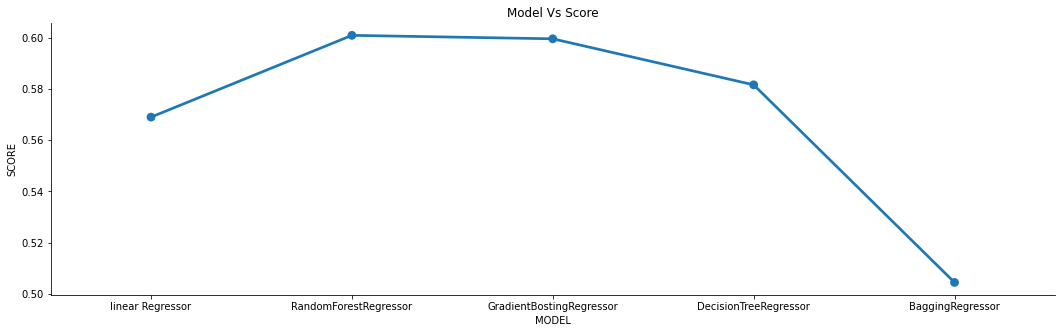

In [133]:
plt.figure(figsize=(18,5))
sns.pointplot(x='Model',y='Score',data=compare)
plt.title('Model Vs Score')
plt.xlabel('MODEL')
plt.ylabel('SCORE')
sns.despine()

# Conclusion
We carried out Data Exploration where we found out some nuances in the data which required remediation. Next, we performed Data Cleaning and Feature Engineering, where we imputed missing values and solved other irregularities, made new features and also made the data model-friendly by label-encoding. Finally we made Regression, Decision Tree and Random Forest Models and got a glimpse of how to tune them for better results. By making different types of models we reach the conclusion that Gradient Boosting Regressor is better than all models as this gives 60% accuracy which is better than others.

# Saving the best model

In [130]:
logger.info('Saving the best model')

2022-03-03 15:31:02,640 INFO:Saving the best model


In [131]:
file = open('grid_rbgr.pkl', 'wb')

#dump information to that file
pickle.dump(grid_rbgr, file)
file.close()